# MILESTONE 2

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
import numpy as np
import os
import matplotlib.pyplot as plt

In [3]:
# Path code and helper functions
os.getcwd()

'C:\\Users\\nick3\\OneDrive\\desktop\\COSC_301\\Project2\\group07-Project\\analysis\\Nick'

# TASK 1

### Exploring and cleaning the dataset into a data frame that we can work with

In [4]:
df = pd.read_csv("C:\\Users\\nick3\\OneDrive\\desktop\\COSC_301\\Project2\\group07-Project\\data\\raw\\defaultOfCreditCardClients.csv",index_col = 0)
df.describe()

# get a count of columns and unique values.

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
count,30001,30001,30001,30001,30001,30001,30001,30001,30001,30001,...,30001,30001,30001,30001,30001,30001,30001,30001,30001,30001
unique,82,3,8,5,57,12,12,12,12,11,...,21549,21011,20605,7944,7900,7519,6938,6898,6940,3
top,50000,2,2,2,29,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
freq,3365,18112,14030,15964,1605,14737,15730,15764,16455,16947,...,3195,3506,4020,5249,5396,5968,6408,6703,7173,23364


In [5]:
#deletes header row
df.drop(index=df.index[0], axis=0, inplace=True)

df.replace("",float("NaN"),inplace=True)
df.dropna(inplace = True)
df.reset_index(drop=True)

# These 3 lines replace any empty cells with NaN, and then remove all spaces that contain Nan and reindexes them.
# Rename all of columns in dataframe
# Pay Stat = payment delays 
            #-1 = paid off in full on time
            # 0 = Bill paid on time
            # 1 = Bill paid 1 months late
            # 2 = Bill paid 2 months late
            # 3 = Bill paid 3 months late
            # 4 = Bill paid 4 months late
            # 5 = Bill paid 5 months late
            # 6 = Bill paid 6 months late
            # 7 = Bill paid 7 months late
            # 8 = Bill paid 8 months late
            # 9 = Bill paid 9+ months late
            # Were taking these scores and merging them to create an arbitrary average single score
            # which we can use to evaluate that persons payment rating. 
            
#Outstanding = Balance owed for the month of XX
#Paid = Balance Paid for the month of XX

#Default = 1 if customer defaulted a payment
#        = 0 if hasn't defaulted a payment     

df = df.rename(columns={"X1":"Credit Limit",
                        "X2":"Sex",
                        "X3":"Education",
                        "X4":"Marital Status",
                        "X5":"Age",
                        "X6":"Pay/Sept07",
                        "X6":"PayStat/Sept05",
                        "X7":"PayStat/Aug05",
                        "X8":"PayStat/Jul05",
                        "X9":"PayStat/Jun05",
                        "X10":"PayStat/May05",
                        "X11":"PayStat/Apr05",
                        "X12":"Outstanding/Sept05",
                        "X13":"Outstanding/Aug05",
                        "X14":"Outstanding/Jul05",
                        "X15":"Outstanding/Jun05",
                        "X16":"Outstanding/May05",
                        "X17":"Outstanding/Apr05",
                        "X18":"Paid/Sept05",
                        "X19":"Paid/Aug05",
                        "X20":"Paid/Jul05",
                        "X21":"Paid/Jun05",
                        "X22":"Paid/May05",
                        "X23":"Paid/Apr05",
                        "Y":"Default"
                       }
              )
df

,Credit Limit,Sex,Education,Marital Status,Age,PayStat/Sept05,PayStat/Aug05,PayStat/Jul05,PayStat/Jun05,PayStat/May05,...,Outstanding/Jun05,Outstanding/May05,Outstanding/Apr05,Paid/Sept05,Paid/Aug05,Paid/Jul05,Paid/Jun05,Paid/May05,Paid/Apr05,Default
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29998,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29999,80000,1,3,1,41,1,-1,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [6]:
df = df.apply(pd.to_numeric)

#Turn column entries into numerical values so we can manipulate them like a number instead of a string. 

In [7]:
#Reconfiguring data:
df["Sex"] = df["Sex"].replace(1,"M")
df["Sex"] = df["Sex"].replace(2,"F")
df["Education"]=df["Education"].replace(1,"MSc or PHd")
df["Education"]=df["Education"].replace(2,"BSc")
df["Education"]=df["Education"].replace(3,"High School Diploma")
df["Education"]=df["Education"].replace(4,"Other")
df["Marital Status"]= df["Marital Status"].replace(1,"Married")
df["Marital Status"]= df["Marital Status"].replace(2,"Single")
df["Marital Status"]= df["Marital Status"].replace(3,"Other")
df["Default"]=df["Default"].replace(1,"True")
df["Default"]=df["Default"].replace(0,"False")

#index for bad data in education
#Condition5 = df["Education"]== 5 
Condition1 = df["Education"]== 0 
Condition5 = df["Education"]== 5 
Condition6 = df["Education"]== 6
# index for bad data in marital status
Condition0 = df["Marital Status"] == 0
index = df.index
ConditionSet = Condition1+Condition5+Condition6+Condition0
EdIndex = index[ConditionSet]
df = df.drop(axis = 0,index=EdIndex)

# These steps were to turn the numerical values into strings that can be understood easier
# Aswell as removing null or useless values in education and marital status.

In [8]:
df['Payment Score'] = (df[['PayStat/Sept05',"PayStat/Aug05","PayStat/Jul05","PayStat/Jun05","PayStat/May05","PayStat/Apr05"]].sum(axis=1, skipna=True)+6)/6                                                                                     
df = df.drop(["PayStat/Jun05","PayStat/Sept05","PayStat/Aug05","PayStat/Jul05","PayStat/May05","PayStat/Apr05"], axis=1)
df['Avg Outstanding'] = (df[['Outstanding/Sept05',"Outstanding/Aug05","Outstanding/Jul05","Outstanding/Jun05","Outstanding/May05","Outstanding/Apr05"]].sum(axis=1, skipna=True))/6                                                                                     
df = df.drop(["Outstanding/Sept05","Outstanding/Aug05","Outstanding/Apr05","Outstanding/Jul05","Outstanding/Jun05","Outstanding/May05"], axis=1)
df['Avg Paid'] = (df[['Paid/Sept05',"Paid/Aug05","Paid/Jul05","Paid/Jun05","Paid/May05","Paid/Apr05"]].sum(axis=1, skipna=True))/6                                                                                     
df = df.drop(["Paid/Sept05","Paid/Aug05","Paid/Apr05","Paid/Jul05","Paid/Jun05","Paid/May05"], axis=1)
df
# Here I converted the multiple columns of payment score, avg outstand and avg paid until ultimate average columns. 
# We decided to do this so we can easily compare a single column of data, rather than half a dozen of each. 

list = ["Credit Limit", "Sex", "Education","Marital Status","Age","Payment Score","Avg Outstanding","Avg Paid","Default"]
df = df.reindex(columns=list)
df

# Reordering the dataframe to be more logical, with the objective variable at the end.  

,Credit Limit,Sex,Education,Marital Status,Age,Payment Score,Avg Outstanding,Avg Paid,Default
1,20000,F,BSc,Married,24,0.666667,1284.000000,114.833333,True
2,120000,F,BSc,Single,26,1.500000,2846.166667,833.333333,True
3,90000,F,BSc,Single,34,1.000000,16942.166667,1836.333333,False
4,50000,F,BSc,Married,37,1.000000,38555.666667,1398.000000,False
5,50000,M,BSc,Married,57,0.666667,18223.166667,9841.500000,False
...,...,...,...,...,...,...,...,...,...
29996,220000,M,High School Diploma,Married,39,1.000000,120891.500000,7091.666667,False
29997,150000,M,High School Diploma,Single,43,0.333333,3530.333333,2415.000000,False
29998,30000,M,BSc,Single,37,2.333333,11749.333333,5216.666667,True
29999,80000,M,High School Diploma,Married,41,0.833333,44435.166667,24530.166667,True


# TASK 2
### Taking the work that was previously done, and doing it in a method chain. Here I will work with how I want the method chain, that later is saved in the PY file. 

In [9]:
path = "C:\\Users\\nick3\\OneDrive\\Desktop\\COSC_301\\Project2\\group07-Project\\data\\raw\\defaultofcreditcardclients.csv"
df1 = ( 
                pd.read_csv(path,index_col = 0)
          )
df2 = ( df1
                .drop(index=df1.index[0])
                .rename(columns={"X1":"Credit Limit",
                            "X2":"Sex",
                            "X3":"Education",
                            "X4":"Marital Status",
                            "X5":"Age",
                            "X6":"Pay/Sept07",
                            "X6":"PayStat/Sept05",
                            "X7":"PayStat/Aug05",
                            "X8":"PayStat/Jul05",
                            "X9":"PayStat/Jun05",
                            "X10":"PayStat/May05",
                            "X11":"PayStat/Apr05",
                            "X12":"Outstanding/Sept05",
                            "X13":"Outstanding/Aug05",
                            "X14":"Outstanding/Jul05",
                            "X15":"Outstanding/Jun05",
                            "X16":"Outstanding/May05",
                            "X17":"Outstanding/Apr05",
                            "X18":"Paid/Sept05",
                            "X19":"Paid/Aug05",
                            "X20":"Paid/Jul05",
                            "X21":"Paid/Jun05",
                            "X22":"Paid/May05",
                            "X23":"Paid/Apr05",
                            "Y":"Default"
                           })
               .apply(pd.to_numeric)
               .replace({'Sex': {1: "M", 2: 'F'}})
               .replace({'Education': {1: "MSc or PHd", 2: 'BSc', 3: 'High School Diploma', 4:"Other", 5:"Delete", 6:"Delete", 0:"Delete"}})
               .replace({'Marital Status': {1: "Married", 2: 'Single', 3: 'Other', 0:"Delete"}})
               .replace({'Default': {1: "True", 0: 'False'}})
               .loc[lambda row : ~row['Education'].str.contains('Delete')]
               .loc[lambda row : ~row['Marital Status'].str.contains('Delete')]
          )
df2
df3 = ( df2
                .assign(Payment_Score=(df2["PayStat/Sept05"]+df2['PayStat/Aug05']+df2['PayStat/Jul05']+df2['PayStat/Jun05']+df2['PayStat/May05']+df2['PayStat/Apr05']+6)/6)
                .assign(Avg_Outstanding=(df2["Outstanding/Sept05"]+df2['Outstanding/Aug05']+df2['Outstanding/Jul05']+df2['Outstanding/Jun05']+df2['Outstanding/May05']+df2['Outstanding/Apr05'])/6)
                .drop(["PayStat/Jun05","PayStat/Sept05","PayStat/Aug05","PayStat/Jul05","PayStat/May05","PayStat/Apr05"], axis=1)
                .drop(["Outstanding/Sept05","Outstanding/Aug05","Outstanding/Apr05","Outstanding/Jul05","Outstanding/Jun05","Outstanding/May05"], axis=1)
                .drop(["Paid/Sept05","Paid/Aug05","Paid/Apr05","Paid/Jul05","Paid/Jun05","Paid/May05"], axis=1)
                .reindex(columns=["Credit Limit", "Sex", "Education","Marital Status","Age","Payment_Score","Avg_Outstanding","Avg_Paid","Default"])
           

          )
df3

,Credit Limit,Sex,Education,Marital Status,Age,Payment_Score,Avg_Outstanding,Avg_Paid,Default
1,20000,F,BSc,Married,24,0.666667,1284.000000,NaN,True
2,120000,F,BSc,Single,26,1.500000,2846.166667,NaN,True
3,90000,F,BSc,Single,34,1.000000,16942.166667,NaN,False
4,50000,F,BSc,Married,37,1.000000,38555.666667,NaN,False
5,50000,M,BSc,Married,57,0.666667,18223.166667,NaN,False
...,...,...,...,...,...,...,...,...,...
29996,220000,M,High School Diploma,Married,39,1.000000,120891.500000,NaN,False
29997,150000,M,High School Diploma,Single,43,0.333333,3530.333333,NaN,False
29998,30000,M,BSc,Single,37,2.333333,11749.333333,NaN,True
29999,80000,M,High School Diploma,Married,41,0.833333,44435.166667,NaN,True


In [10]:
## now that I am happy with the above method chains, I put thim into a py file, which I will call below to ensure the same results are yielded. 

from Scripts import FunctionScript
df_test = FunctionScript.LoadnClean("C:\\Users\\nick3\\OneDrive\\Desktop\\COSC_301\\Project2\\group07-Project\\data\\raw\\defaultofcreditcardclients.csv")
df_test


,Credit Limit,Sex,Education,Marital Status,Age,Payment_Score,Avg_Outstanding,Avg_Paid,Default
1,20000,F,BSc,Married,24,0.666667,1284.000000,114.833333,True
2,120000,F,BSc,Single,26,1.500000,2846.166667,833.333333,True
3,90000,F,BSc,Single,34,1.000000,16942.166667,1836.333333,False
4,50000,F,BSc,Married,37,1.000000,38555.666667,1398.000000,False
5,50000,M,BSc,Married,57,0.666667,18223.166667,9841.500000,False
...,...,...,...,...,...,...,...,...,...
29996,220000,M,High School Diploma,Married,39,1.000000,120891.500000,7091.666667,False
29997,150000,M,High School Diploma,Single,43,0.333333,3530.333333,2415.000000,False
29998,30000,M,BSc,Single,37,2.333333,11749.333333,5216.666667,True
29999,80000,M,High School Diploma,Married,41,0.833333,44435.166667,24530.166667,True


# TASK 3
### Time to explore the data and try to find some correlations

In [11]:
df = df_test
df.describe()

,Credit Limit,Age,Payment_Score,Avg_Outstanding,Avg_Paid
count,29601.000000,29601.000000,29601.000000,29601.000000,29601.000000
mean,167550.544914,35.464072,0.820079,44819.895674,5257.963830
std,129944.020953,9.213243,0.984192,63130.355414,10136.308404
min,10000.000000,21.000000,-1.000000,-56043.166667,0.000000
25%,50000.000000,28.000000,0.166667,4761.333333,1114.833333
50%,140000.000000,34.000000,1.000000,20912.666667,2392.166667
75%,240000.000000,41.000000,1.000000,56878.000000,5570.666667
max,1000000.000000,79.000000,7.000000,877313.833333,627344.333333


<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

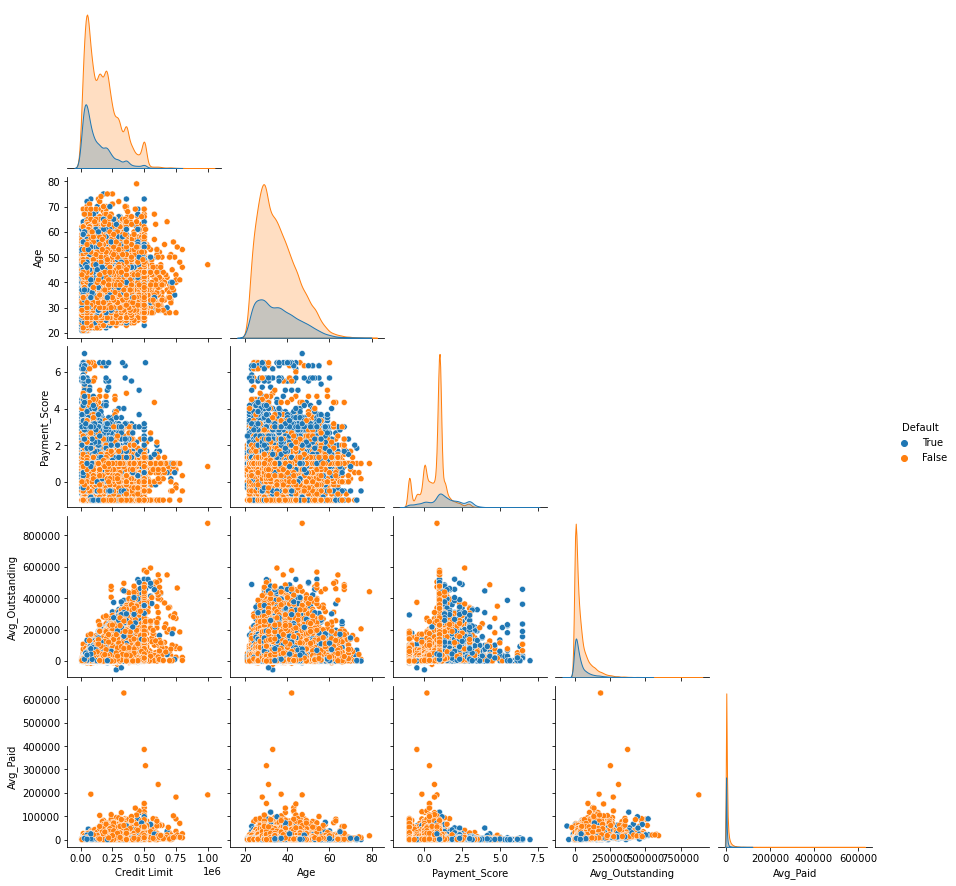

In [12]:
pairplot = sns.pairplot(data=df, hue="Default", corner="True")
sns.despine

Above is a basic, unmodified pairgrid
this graph gives a good visual to the correlations of data between the categories.
Though the marker sizes, and unfortunate over plotting that occurs, its easy to see where strong correlations appear
It can also be seen that Payment score is one of the leading factors in defaulting of credit cards. 

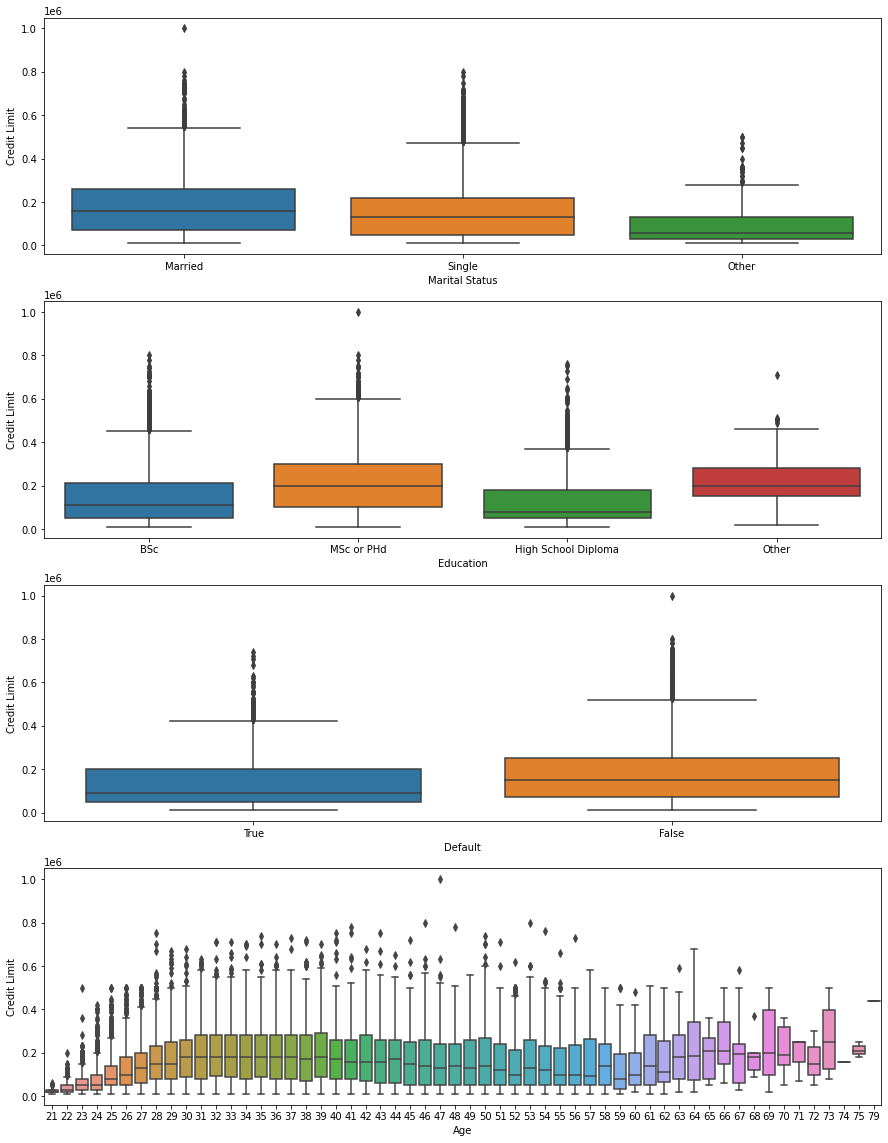

In [13]:
l = ["Marital Status","Education", "Default", "Age"]
fig, ax = plt.subplots(4, 1, figsize=(15, 20))
for var, subplot in zip(l, ax.flatten()):
    sns.boxplot(x=var, y='Credit Limit', data=df, ax=subplot)

The above plots show medians of various metrics. Some against our goal of default, others between each other to view parameters. It appears there isnt much of a deviation of outstanding balance against marital status, and education

The following plots are pairplots with a differing hue to look at the distribution of different subsets of the data. This is not idea for the research question I am looking to answer, which is the effect of age on defaulting, but gives good insight into the dataset.

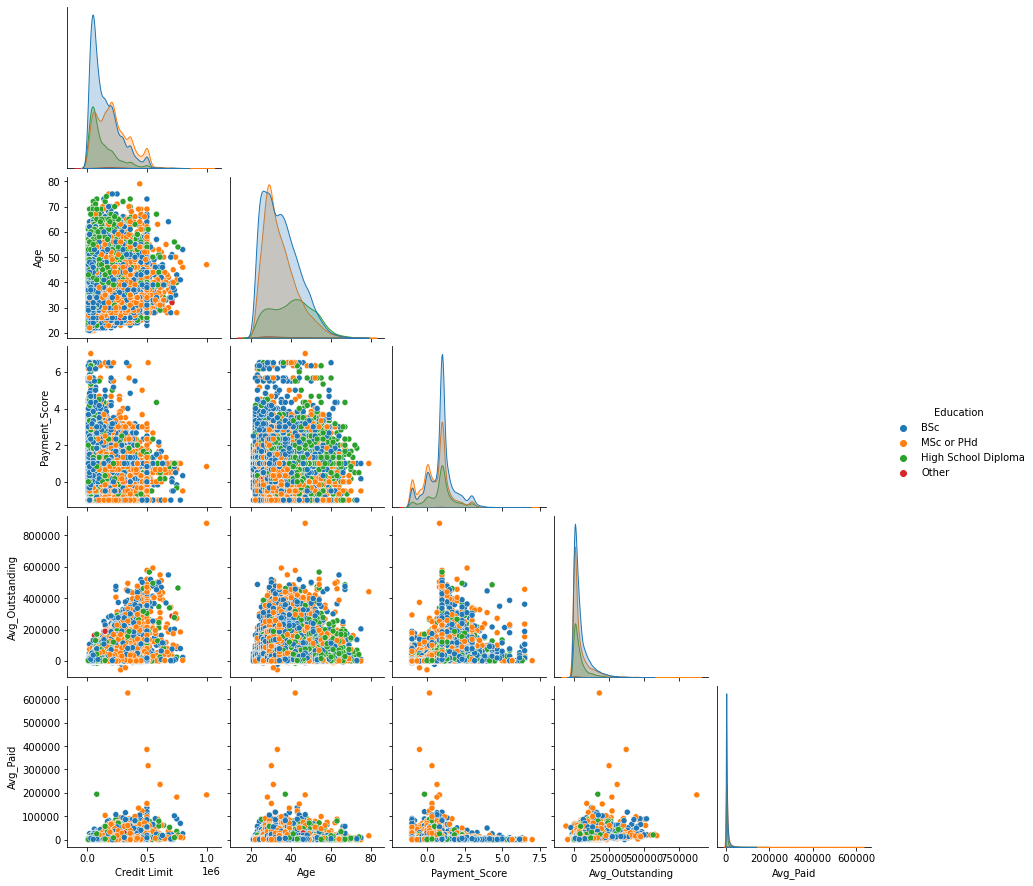

In [14]:
sns.pairplot(data=df, hue="Education", corner="True")
sns.despine()

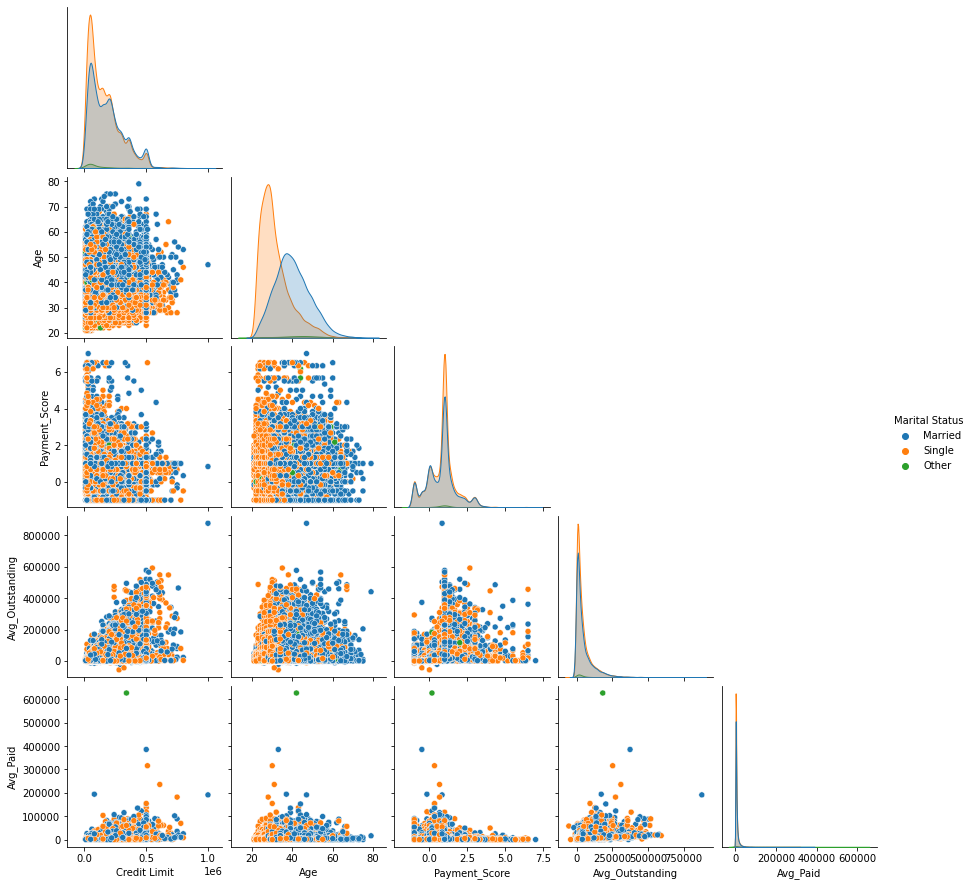

In [15]:
sns.pairplot(data=df, hue="Marital Status", corner="True")
sns.despine()

By observing these plots, and the pandas profile created by my peer, I believe I can attain sufficent knowledge in the correlations between the frequency of defaults and the datasets variables.
Though, I need to gain a further insight into the effect age has on the probability of defaulting. Therefore the following plots are based on Age.
The violin and strip plots show a great deal of the data lays in the age group of 20-40yrs old. This should be noted as it may skew the results of age's effect. 

<AxesSubplot:xlabel='Default', ylabel='Age'>

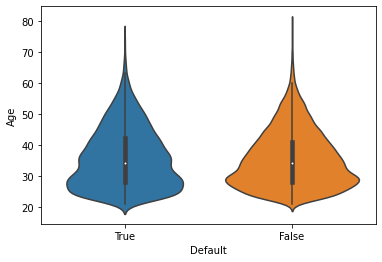

In [16]:
sns.violinplot(data=df, y='Age', x='Default')

<AxesSubplot:xlabel='Default', ylabel='Age'>

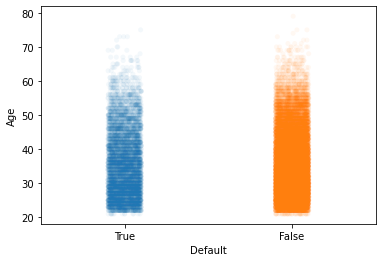

In [17]:
sns.stripplot(x='Default',y ='Age', data = df, alpha=0.05)

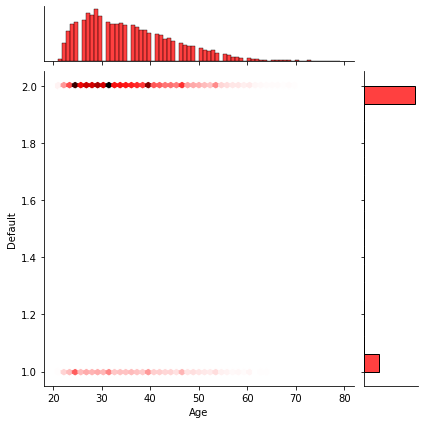

In [18]:
df["Default"]=df["Default"].replace("True",1)
df["Default"]=df["Default"].replace("False",2)

sns.jointplot(data=df, x='Age', y='Default',kind = 'hex',color='red')
sns.despine()


The joint plot displays defaults "true" value as 1, and "false" as 2. It correlates the same with the above graphs, but shows a vast difference in the amount of defaults from the above graphs. From here, I believe I can begin to start asking questions, and dive into the data a bit more narrowed in and find suitable outcomes.

The data gained through this data evaluation gave a great insight into the dataset. I believe I am able to develop specific questions and dive into more particular and narrowed in regions of the data set.